직관적인 이해력 up

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.datasets import load_boston

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
print(mpl.__version__)

3.3.4


## Colormaps

### 1. data

In [2]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dfx = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
dfb = pd.concat([dfx, dfy], axis=1)
dfb.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


사실 여기서 feature가 어떤 변수인지 다 알아야 한다.

- DIS: 직업센터까지 거리
- target 변수 MEDV는 주택 가격 중앙값을 의미한다.

#### 시각화

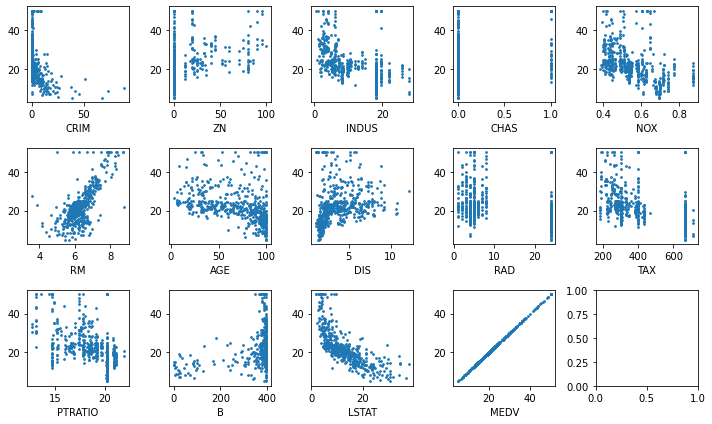

In [5]:
fig, ax = plt.subplots(3, 5, figsize=(10, 6))

axes = ax.ravel()  # ravel alike flatten, 입력에 대한 flatten일 뿐, show line은 바뀌지 않는다.
feats = boston.feature_names
for i, col in enumerate(dfb.columns):
  axes[i].scatter(dfb[col], dfb["MEDV"], s=3)
  axes[i].set_xlabel(col)

plt.tight_layout() # default 설정이 넉넉하게 되어 있나 보다.
plt.show()

#### 한글로 다시 표기

In [6]:
labels_kr = [
  "범죄율", "25kft2 초과 비율", "비상업 면적비율", "찰스강 근교 여부", "일산화질소 농도",
  "평균 방 수", "< 1940년 주택 비율", "직업센터까지 거리", "고속도로까지 거리", "재산세율",
  "학생 교사 비율", "흑인 비율", "하위 계층 비율", "주택 가격 (중앙값)"]

cols = dfb.columns
labelb = dict(zip(cols, labels_kr))
print(labelb)

{'CRIM': '범죄율', 'ZN': '25kft2 초과 비율', 'INDUS': '비상업 면적비율', 'CHAS': '찰스강 근교 여부', 'NOX': '일산화질소 농도', 'RM': '평균 방 수', 'AGE': '< 1940년 주택 비율', 'DIS': '직업센터까지 거리', 'RAD': '고속도로까지 거리', 'TAX': '재산세율', 'PTRATIO': '학생 교사 비율', 'B': '흑인 비율', 'LSTAT': '하위 계층 비율', 'MEDV': '주택 가격 (중앙값)'}


In [7]:
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
X:\Program Files\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Program Files\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Program Files\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Program Files\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Program Files\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
X:\Program Files\Anaconda3\lib\site-p

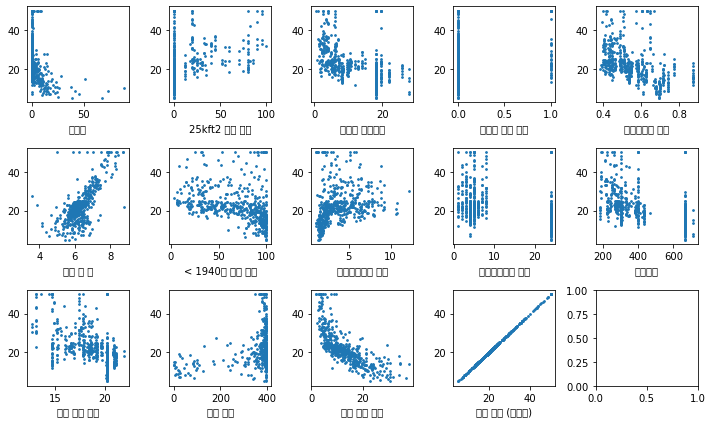

In [8]:
fig, ax = plt.subplots(3, 5, figsize=(10, 6))

axes = ax.ravel()
# feats = boston.feature_names
for i, col in enumerate(dfb.columns):
  axes[i].scatter(dfb[col], dfb["MEDV"], s=3)
  axes[i].set_xlabel(labelb[col])

plt.tight_layout()
plt.show()

그림에서 집값은 범죄율, 비상업 면적비율, 일산화질소 농도, 하위 계층 비율과는 음의 선형관계를 보이고, 평균 방 수, 흑인 비율과는 양의 선형관계를 보이며, 나머지는 그림으로 파악하기 어려워 상관계수를 통해 확인하는 것이 좋을 듯 싶다.

### 2. Colormap Basic

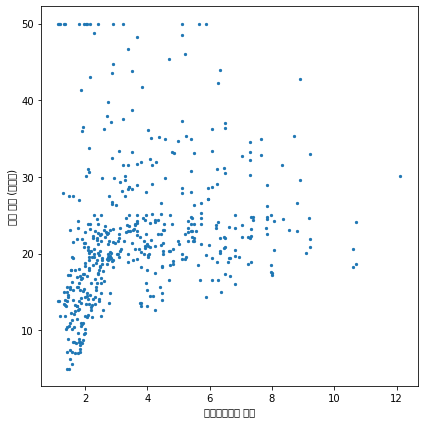

In [9]:
plt.figure(figsize=(6, 6))

plt.scatter(dfb["DIS"], dfb["MEDV"], s=5)

plt.xlabel(labelb["DIS"])
plt.ylabel(labelb["MEDV"])
plt.tight_layout()
plt.show()

확실한 선형 관계로 보긴 어렵다. 다른 추가 변수가 있는 듯 보인다.<br />
여기선 시간을 숨은 변수로 추정하고 그림에 변수를 추가해본다.

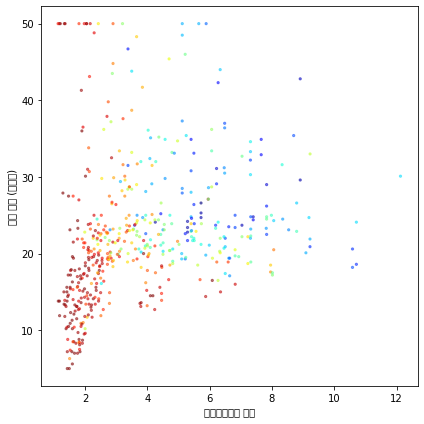

In [10]:
plt.figure(figsize=(6, 6))

plt.scatter(dfb["DIS"], dfb["MEDV"], s=5, c=dfb["AGE"], cmap="jet", alpha=.5)
plt.xlabel(labelb["DIS"])
plt.ylabel(labelb["MEDV"])
plt.tight_layout()
plt.show()

여기선 노후된 것이 집값과 양 또는 음의 관계가 있다고 말할 수는 없지만,<br />
집의 노후가 주택 가격 (중앙값) 및 직업센터까지 거리의 관계를 설명하는데 도움을 줄 수 있을 것 같다.

<img src="images/matplotlib_4_colormaps.png" style="display: block; margin: auto;" alt="matplotlib 4 colormaps" />

### 3. Colorbar

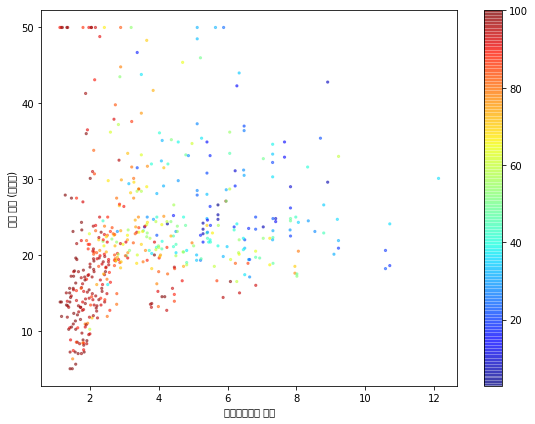

In [11]:
plt.figure(figsize=(8, 6))

im = plt.scatter(dfb["DIS"], dfb["MEDV"], s=5, c=dfb["AGE"], cmap="jet", alpha=.5)
plt.colorbar(im)

plt.xlabel(labelb["DIS"])
plt.ylabel(labelb["MEDV"])

plt.tight_layout()
plt.show()

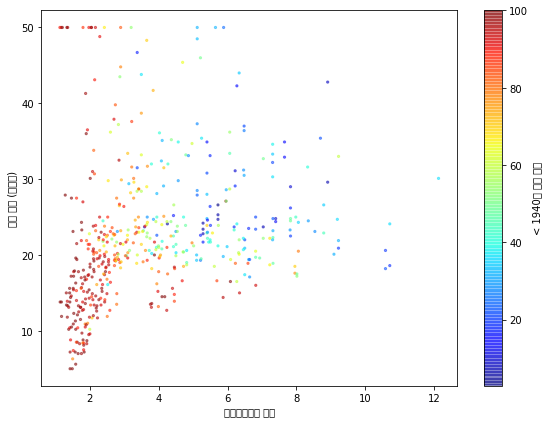

In [12]:
plt.figure(figsize=(8, 6))
im = plt.scatter(dfb["DIS"], dfb["MEDV"], s=5, c=dfb["AGE"], cmap="jet", alpha=.5)
cbar = plt.colorbar(im)

plt.xlabel(labelb["DIS"])
plt.ylabel(labelb["MEDV"])
cbar.set_label(labelb["AGE"])

plt.tight_layout()
plt.show()

#### axes의 parameter를 건드려보자.

- orientation: vertical vs horizontal
- aspect: colorbar가 차지하는 비율, 0.15 (default)
- fraction: colorbar의 긴 변 : 짧은 변 비율, 20 (default)

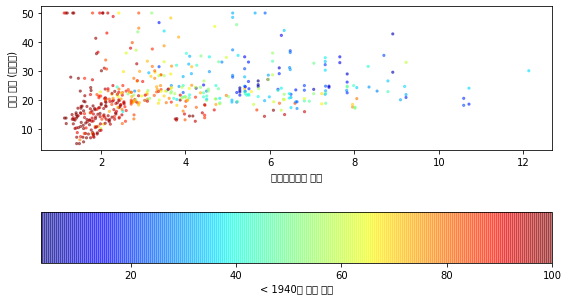

In [13]:
plt.figure(figsize=(8, 6))
im = plt.scatter(dfb["DIS"], dfb["MEDV"], s=5, c=dfb["AGE"], cmap="jet", alpha=.5)
cbar = plt.colorbar(im, orientation="horizontal", aspect=10, fraction=.5)

plt.xlabel(labelb["DIS"])
plt.ylabel(labelb["MEDV"])
cbar.set_label(labelb["AGE"])
plt.tight_layout()
plt.show()

#### colorbar의 parameter를 건드려보자.

- ticks: colorbar에서 값을 보여줄 위치 (0 ~ 100을 기준을 계산함), automatic (default)
- format: colorbar legend의 표기 형식을 정함.
- drawedges: 구간마다 윤곽선 그리기 여부, False (default)
  - 1 단위로 edge가 생겨서 colorbar가 어두워진다고.
  - https://stackoverflow.com/questions/15003353/why-does-my-colorbar-have-lines-in-it

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


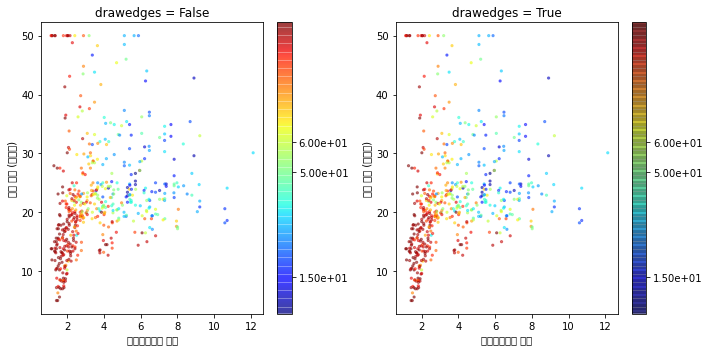

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(ax)):
  im = ax[i].scatter(dfb["DIS"], dfb["MEDV"], s=5, c=dfb["AGE"], cmap="jet", alpha=.5)
  cbar = plt.colorbar(im, ax=ax[i], ticks=[15, 50, 60], format="%1.2e", drawedges=i)

  ax[i].set_xlabel(labelb["DIS"])
  ax[i].set_ylabel(labelb["MEDV"])
  ax[i].set_title(f"drawedges = {bool(i)}")

plt.tight_layout()

#### colorbar 중복 제거

<ipython-input-15-48fcf93e4e15>:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


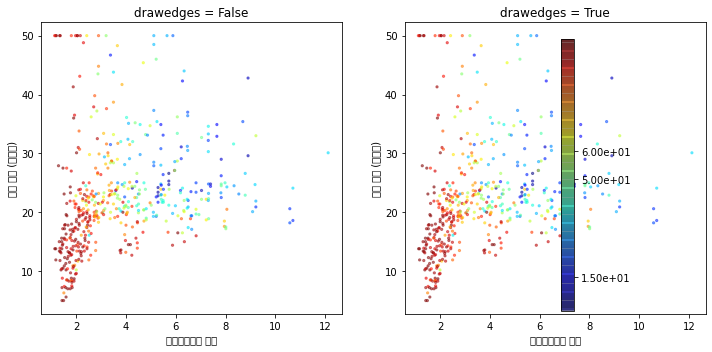

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(ax)):
  im = ax[i].scatter(dfb["DIS"], dfb["MEDV"], s=5, c=dfb["AGE"], cmap="jet", alpha=.5)
  ax[i].set_xlabel(labelb["DIS"])
  ax[i].set_ylabel(labelb["MEDV"])
  ax[i].set_title(f"drawedges = {bool(i)}")

cbar = plt.colorbar(im, ax=ax, ticks=[15, 50, 60], format="%1.2e", drawedges=i)
plt.tight_layout()

직관적으로 마지막에 넣으려다 실패한 모습이다.<br />
마지막 그림에만 colorbar를 설정하는 것은 colorbar를 하나만 넣는 좋은 방법이지만, 마지막 그림만 colorbar가 인식되어 그림 폭이 작아지므로 다른 그림과 비교하기 어렵게 된다.

<ipython-input-16-8d00ebe49f08>:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=(0, 0, 0.75, 1))


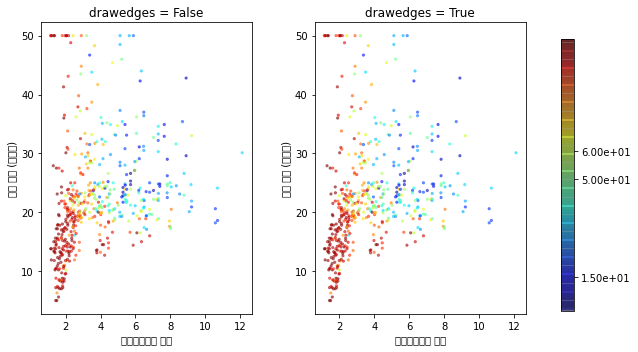

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(len(ax)):
  im = ax[i].scatter(dfb["DIS"], dfb["MEDV"], s=5, c=dfb["AGE"], cmap="jet", alpha=.5)
  ax[i].set_xlabel(labelb["DIS"])
  ax[i].set_ylabel(labelb["MEDV"])
  ax[i].set_title(f"drawedges = {bool(i)}")

plt.colorbar(im, ax=ax, ticks=[15, 50, 60], format="%1.2e", drawedges=i)
plt.tight_layout(rect=(0, 0, 0.75, 1))

### 4. Image as 2D data

LUT: Look-up Table, 변환에서 가능한 모든 input에 대응하는 output을 table로 정리해두고 필요한 값은 대응되는 값을 찾아 이용하는 방식.<br />
그르네. 값에 대한 색 지정은 범위 맞춰서 그냥 불러쓰는 거니까 LUT로 볼 수도 있겠네.

<!-- 데이터 링크로 불러쓰려다가 참았다.
https://jehyunlee.github.io/2020/03/01/Python-DS-4-matplotlib_colormap/4_cmap_16.tif -->

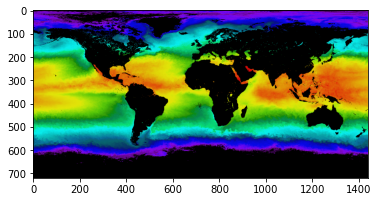

In [17]:
image = Image.open("images/4_cmap_16.tif")
plt.imshow(image)
plt.show()

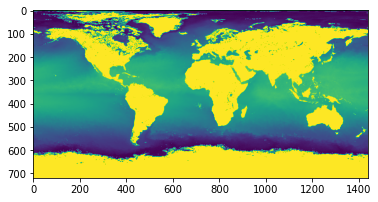

In [18]:
imarray = np.array(image)
plt.imshow(imarray)
# plt.imsave("4_cmap_17.png", imarray)
plt.show()

np.narray에 대한 기본 colormap virdis가 적용되었음.

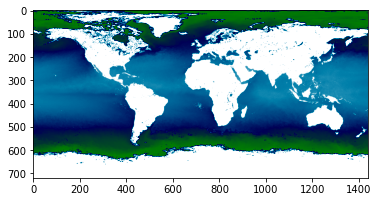

In [19]:
plt.imshow(imarray, cmap="ocean")
# plt.imsave("4_cmap_18.png", imarray, cmap="ocrean")
plt.show()